In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from sklearn.linear_model import LinearRegression 
import scipy.stats as sc

In [12]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [14]:
boston_df.shape

(506, 14)

In [15]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


[Text(0.5, 0, "Median value of owner-occupied homes in $1000's"),
 Text(0, 0.5, 'Boxplot'),
 Text(0.5, 1.0, 'boxplot for the Median value of owner-occupied homes')]

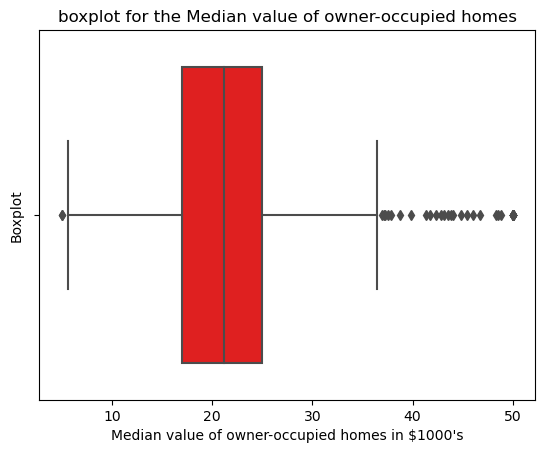

In [16]:
#Provide boxplot for the Median value of owner-occupied homes
homeOwner = sns.boxplot(x = 'MEDV', color = 'red', data = boston_df)
homeOwner.set(xlabel = "Median value of owner-occupied homes in $1000's", ylabel = 'Boxplot',title = 'boxplot for the Median value of owner-occupied homes')


<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

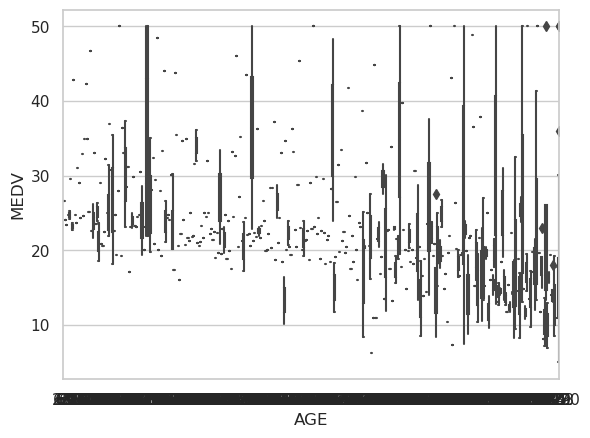

In [33]:
ax = sns.boxplot(x='AGE', y='MEDV', data=boston_df)
ax

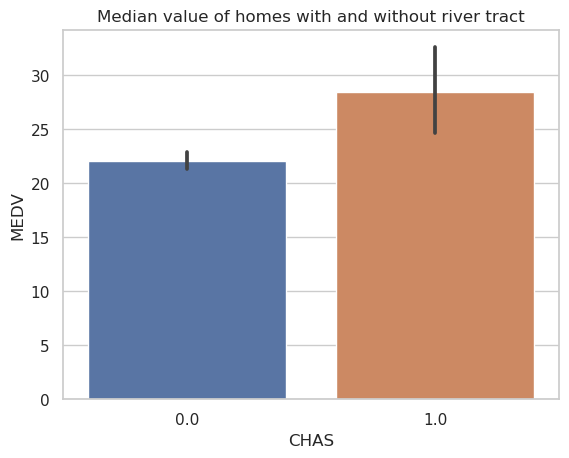

In [32]:
sns.set(style="whitegrid")
bp = sns.barplot(x="CHAS", y="MEDV", data=boston_df).set(title= "Median value of homes with and without river tract")

[Text(0.5, 0, 'Charles River Dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histopgram for the Charles River variable')]

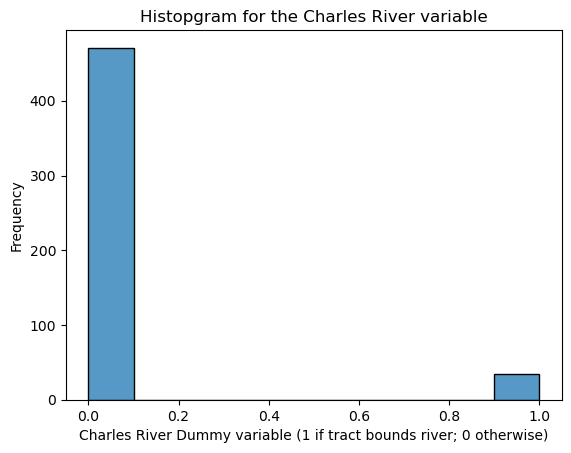

In [18]:
#provide histogram for the charles river variable
histogram = sns.histplot(boston_df['CHAS'])
histogram.set(xlabel = 'Charles River Dummy variable (1 if tract bounds river; 0 otherwise)', ylabel = 'Frequency', title = 'Histopgram for the Charles River variable')


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Charles River Dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Bar plot for the Charles River variable')]

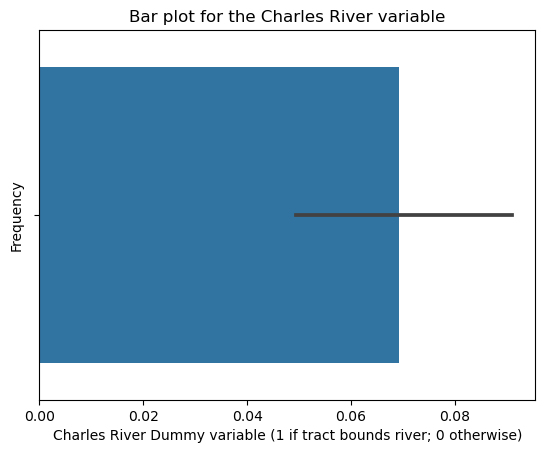

In [30]:
#provide histogram for the charles river variable
Bar = sns.barplot(boston_df['CHAS'])
Bar.set(xlabel = 'Charles River Dummy variable (1 if tract bounds river; 0 otherwise)', ylabel = 'Frequency', title = 'Bar plot for the Charles River variable')


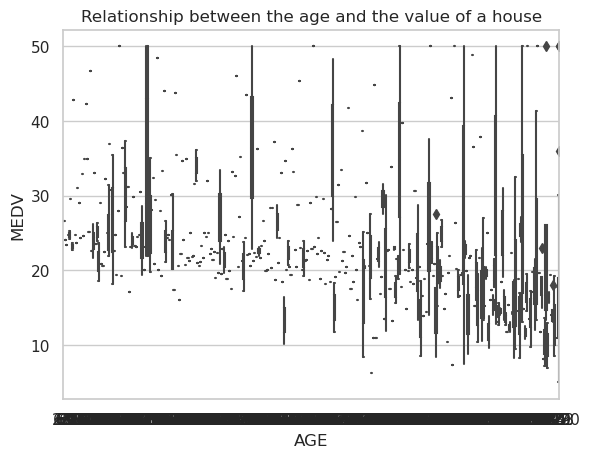

In [34]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']= '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE'] < 70) ,'age_group']= 'Between 35 and 70 years old'
boston_df.loc[(boston_df['AGE']>=70),'age_group']= '70 years and older'
sns.set(style='whitegrid')
bp = sns.boxplot(x='AGE', y='MEDV', data=boston_df).set(title='Relationship between the age and the value of a house')

[Text(0.5, 0, 'Proprtion of woner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for MEDV variable vs the AGE variable')]

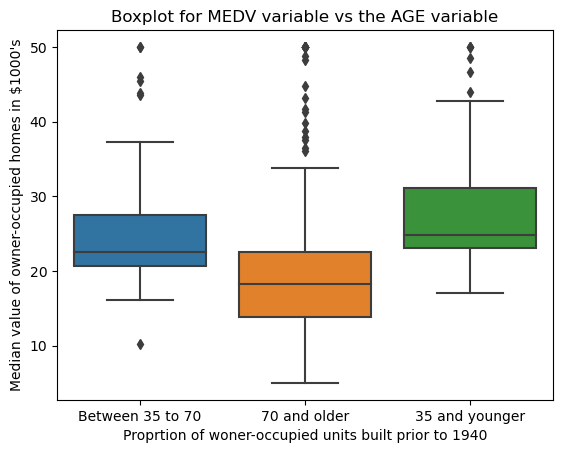

In [19]:
#provide a boxplot for the MEDV  and AGE. Discretize the age into three groups: 35 and younger, 35-70, and 70 and older
boston_df.loc[boston_df['AGE'] <= 35, 'Group_byAge'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Group_byAge'] ='Between 35 to 70'
boston_df.loc[boston_df['AGE'] >=70, 'Group_byAge'] = '70 and older'

boxplotMEDV_AGE = sns.boxplot(x = 'Group_byAge', y = 'MEDV', data = boston_df)
boxplotMEDV_AGE.set(xlabel = 'Proprtion of woner-occupied units built prior to 1940',
                    ylabel = "Median value of owner-occupied homes in $1000's",
                    title = 'Boxplot for MEDV variable vs the AGE variable')

[Text(0.5, 0, 'Proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxides concentration (parts per 10 million)'),
 Text(0.5, 1.0, 'Scatter Plot of NOX vs INDUS')]

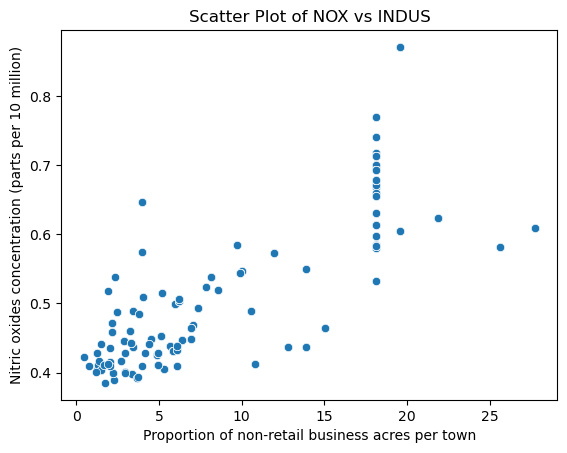

In [20]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
scatterPlot = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatterPlot.set(xlabel = 'Proportion of non-retail business acres per town', ylabel= 'Nitric oxides concentration (parts per 10 million)', title = "Scatter Plot of NOX vs INDUS")


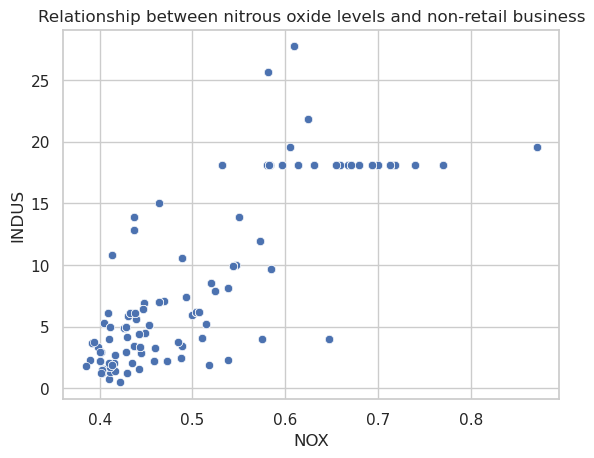

In [35]:
sns.set(style='whitegrid')
bp = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title='Relationship between nitrous oxide levels and non-retail business')

[Text(0.5, 0, 'Pupil-teacher ratio by town'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

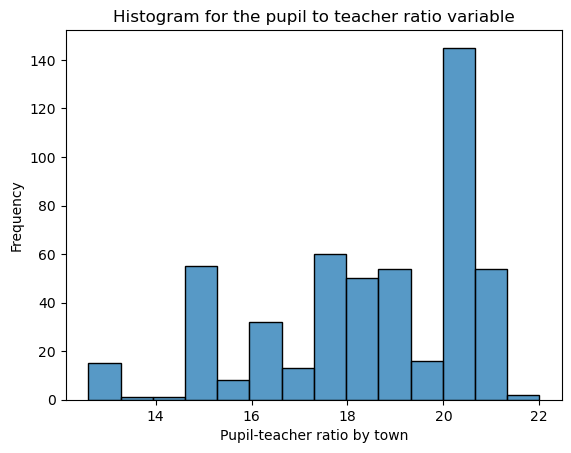

In [21]:
#Create a histogram for the pupil to teacher ratio variable
histogram2 = sns.histplot(boston_df['PTRATIO'])
histogram2.set(xlabel = 'Pupil-teacher ratio by town', ylabel = 'Frequency', title = 'Histogram for the pupil to teacher ratio variable')


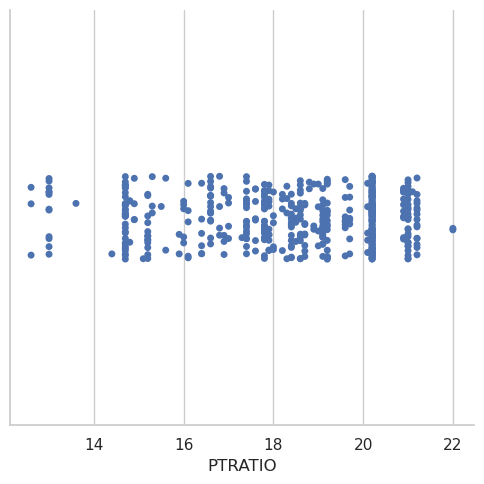

In [36]:
sns.set(style='whitegrid')
bp = sns.catplot(x='PTRATIO', data=boston_df)

In [22]:
#use Levene's Test
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

In [37]:
#There is no significant difference in median value of houses bounded by the Charles river or not
X = boston_df['CHAS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()
#Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in median home values for homes that bound the Charles river and homes that do not.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           7.39e-05
Time:                        01:34:21   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#use the ttest_ind from the scipy_stats library
scipy.stats.ttest_ind(boston_df['MEDV'],boston_df['CHAS'], equal_var = True)

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [40]:
boston_df.loc [(boston_df['AGE']<=35),'age_group'] = '35 years and younger' 
boston_df.loc [(boston_df['AGE']>35)&(boston_df ['AGE'] < 70),'age_group'] = 'between 35 and 70 years old' 
boston_df.loc [(boston_df['AGE']<=35),'age_group'] = '70 years and older'
sc.levene(boston_df[boston_df['age_group'] == '35 years and younger'] ['MEDV'],
          boston_df[boston_df['age_group'] == 'between 35 and 70 years old'] ['MEDV'],
          boston_df[boston_df['age_group'] == '70 years and older'] ["MEDV"],
          center='mean')

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [24]:

#Categorize by age 
boston_df.loc[boston_df['AGE'] <= 35, 'Group_byAge'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Group_byAge'] ='Between 35 to 70'
boston_df.loc[boston_df['AGE'] >=70, 'Group_byAge'] = '70 and older'

#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['Group_byAge'] == '35 and younger']['MEDV'],
                  boston_df[boston_df['Group_byAge'] == 'Between 35 to 70']['MEDV'],
                  boston_df[boston_df['Group_byAge']=='70 and older']['MEDV'], center = 'mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [25]:
#Separate the three samples
thirtyFive_Lower = boston_df[boston_df['Group_byAge'] == '35 and younger']['MEDV']
Btw35_70 = boston_df[boston_df['Group_byAge'] == 'Between 35 to 70']['MEDV']
seventy_Older = boston_df[boston_df['Group_byAge'] == '70 and older']['MEDV']

In [41]:
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger'] ['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years old'] ['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older'] ["MEDV"]

In [26]:
#Now, Run a one way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(thirtyFive_Lower, Btw35_70, seventy_Older)
print('F_statistic: {0}, P-Value: {1}'.format(f_statistic,p_value))

F_statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [42]:
f_statistic, p_value = sc.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print('F_Statistic: {0}, P-value: {1}'.format(f_statistic, p_value))

F_Statistic: nan, P-value: nan


/tmp/wsuser/ipykernel_164/691640802.py:1: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_statistic, p_value = sc.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [43]:
# There is no correlation between the proportion of non-retail business acres per town and the Nitric Oxide concentrations in the air 
sc.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
# Since the p-value is less than 0.05, we reject the null hypothesiss and conclude that there is a correlation between the proportion of non-retail business acres per town and the Nitric Oxide concentrations in the air


/tmp/wsuser/ipykernel_164/3640306169.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sc.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


(0.7636514469209151, 7.913361061238693e-98)

In [27]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

In [44]:
X = boston_df['AGE'] 
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.57e-18
Time:                        01:36:58   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.000      29.016      32.942
AGE           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Regression with T-Test:
# X is the input variables(or independent variables)
x = boston_df['DIS']

#Y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept(beta_0) to the model
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

#print out statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        01:22:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# There is no impact of additional distance to Boston employment centers on the median value of homes
X = boston_df['DIS'] 
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()
# For every mile in increased distance from an employment center, the value of a house increases by $1,091.60

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        01:37:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""